## About
The objective of this challenge is to predict PM2.5 particulate matter concentration in the air every day for each city. PM2.5 refers to atmospheric particulate matter that have a diameter of less than 2.5 micrometers and is one of the most harmful air pollutants. PM2.5 is a common measure of air quality that normally requires ground-based sensors to measure.

In [1]:
# Import the libraries
import pandas as pd
import numpy as np

In [2]:
# Load the data
air_df = pd.read_csv("Train.csv")

air_df

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,38.593017,-61.752587,22.363665,1793.793579,3227.855469,0.010579,74.481049,37.501499,-62.142639,22.545118
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,59.624912,-67.693509,28.614804,1789.960449,3384.226562,0.015104,75.630043,55.657486,-53.868134,19.293652
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,49.839714,-78.342701,34.296977,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,29.181258,-73.896588,30.545446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,0.797294,-68.612480,26.899694,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,YWSFY6Q X 2020-03-15,2020-03-15,YWSFY6Q,22.0,14.0,83.0,3848.86,72,6.700000,68.300003,...,54.302954,12.312248,49.871571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30553,YWSFY6Q X 2020-03-16,2020-03-16,YWSFY6Q,53.0,30.0,146.0,9823.87,72,6.300000,77.700005,...,36.170757,-129.236726,49.779531,1863.555567,3475.020107,0.052920,-96.149506,33.230234,-157.067467,49.912310
30554,YWSFY6Q X 2020-03-17,2020-03-17,YWSFY6Q,85.0,52.0,153.0,8900.85,72,7.100000,68.500000,...,8.955216,-162.856069,48.459205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30555,YWSFY6Q X 2020-03-18,2020-03-18,YWSFY6Q,103.0,33.0,149.0,13963.90,72,19.100000,66.300003,...,17.974815,-168.906764,47.293537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
air_df.dropna()

In [3]:
# Column names
air_df.columns

Index(['Place_ID X Date', 'Date', 'Place_ID', 'target', 'target_min',
       'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
   

### Dealing with null values

In [4]:
# Does the dataset contain null values?
air_df.isnull().sum()

Place_ID X Date                     0
Date                                0
Place_ID                            0
target                              0
target_min                          0
                                ...  
L3_CH4_aerosol_optical_depth    24765
L3_CH4_sensor_azimuth_angle     24765
L3_CH4_sensor_zenith_angle      24765
L3_CH4_solar_azimuth_angle      24765
L3_CH4_solar_zenith_angle       24765
Length: 82, dtype: int64

In [5]:
air_df["target_min"].isnull().sum()

0

In [6]:
# Check for all null values in each column
for column in air_df.columns[:]:
    print(air_df[column].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
2189
2189
2189
2189
2189
2190
2190
2190
2190
2190
2190
8669
283
283
283
283
283
283
283
5423
5423
5423
5423
5423
5423
5423
5423
7425
7425
7425
7425
7425
7425
7425
7425
1522
1522
374
1522
1522
1522
374
374
374
374
1522
197
197
197
197
197
197
7237
7237
7237
7308
7237
7237
7237
7237
7237
24765
24765
24765
24765
24765
24765
24765


In [7]:
for ind, column in enumerate(air_df.columns):
    print(column)

Place_ID X Date
Date
Place_ID
target
target_min
target_max
target_variance
target_count
precipitable_water_entire_atmosphere
relative_humidity_2m_above_ground
specific_humidity_2m_above_ground
temperature_2m_above_ground
u_component_of_wind_10m_above_ground
v_component_of_wind_10m_above_ground
L3_NO2_NO2_column_number_density
L3_NO2_NO2_slant_column_number_density
L3_NO2_absorbing_aerosol_index
L3_NO2_cloud_fraction
L3_NO2_sensor_altitude
L3_NO2_sensor_azimuth_angle
L3_NO2_sensor_zenith_angle
L3_NO2_solar_azimuth_angle
L3_NO2_solar_zenith_angle
L3_NO2_stratospheric_NO2_column_number_density
L3_NO2_tropopause_pressure
L3_NO2_tropospheric_NO2_column_number_density
L3_O3_O3_column_number_density
L3_O3_O3_effective_temperature
L3_O3_cloud_fraction
L3_O3_sensor_azimuth_angle
L3_O3_sensor_zenith_angle
L3_O3_solar_azimuth_angle
L3_O3_solar_zenith_angle
L3_CO_CO_column_number_density
L3_CO_H2O_column_number_density
L3_CO_cloud_height
L3_CO_sensor_altitude
L3_CO_sensor_azimuth_angle
L3_CO_senso

In [8]:
# Fill rows that have null values using fillna

mis_val = air_df.isnull().sum()

# create a list of columns with less than 10,000 missing values
cols_to_fill = list(mis_val[mis_val < 10000].index)

# fill missing values in the selected columns with the mean value of the column
air_df[cols_to_fill] = air_df[cols_to_fill].fillna(air_df[cols_to_fill].mean())

C:\Users\ronni\AppData\Local\Temp\ipykernel_9124\1256490153.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  air_df[cols_to_fill] = air_df[cols_to_fill].fillna(air_df[cols_to_fill].mean())


In [9]:
# Drop columns that have any missing value
air_df = air_df.dropna(axis=1)

In [10]:
# Check for all null values in each column
for column in air_df.columns[:]:
    print(air_df[column].isnull().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [11]:
air_df

,Place_ID X Date,Date,Place_ID,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,...,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
0,010Q650 X 2020-01-02,2020-01-02,010Q650,38.0,23.0,53.0,769.50,92,11.000000,60.200001,...,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665
1,010Q650 X 2020-01-03,2020-01-03,010Q650,39.0,25.0,63.0,1319.85,91,14.600000,48.799999,...,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804
2,010Q650 X 2020-01-04,2020-01-04,010Q650,24.0,8.0,56.0,1181.96,96,16.400000,33.400002,...,34.296977,0.000150,0.356925,0.000053,-1.572950,0.082063,-105.201338,49.839714,-78.342701,34.296977
3,010Q650 X 2020-01-05,2020-01-05,010Q650,49.0,10.0,55.0,1113.67,96,6.911948,21.300001,...,30.545393,0.000227,0.584522,0.000110,-1.239317,0.121261,-104.334066,29.181258,-73.896588,30.545446
4,010Q650 X 2020-01-06,2020-01-06,010Q650,21.0,9.0,52.0,1164.82,95,13.900001,44.700001,...,26.899694,0.000390,0.408047,0.000159,0.202489,0.037919,58.850179,0.797294,-68.612480,26.899694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,YWSFY6Q X 2020-03-15,2020-03-15,YWSFY6Q,22.0,14.0,83.0,3848.86,72,6.700000,68.300003,...,49.871571,0.000312,0.203573,0.000063,-1.953480,0.001310,-16.856890,54.302954,12.312248,49.871571
30553,YWSFY6Q X 2020-03-16,2020-03-16,YWSFY6Q,53.0,30.0,146.0,9823.87,72,6.300000,77.700005,...,49.012079,0.000362,0.234613,0.000090,-2.178236,0.007644,-85.223618,36.170757,-129.236726,49.779531
30554,YWSFY6Q X 2020-03-17,2020-03-17,YWSFY6Q,85.0,52.0,153.0,8900.85,72,7.100000,68.500000,...,48.459205,0.000107,0.263715,0.000031,-2.365827,0.025447,-103.669725,8.955216,-162.856069,48.459205
30555,YWSFY6Q X 2020-03-18,2020-03-18,YWSFY6Q,103.0,33.0,149.0,13963.90,72,19.100000,66.300003,...,47.292238,0.000014,0.546447,-0.000008,-2.784346,0.153445,71.095910,17.974815,-168.906764,47.293537


In [12]:
# Data information
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 75 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

In [13]:
# Summary statistics
air_df.describe()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
count,30557.000000,30557.000000,30557.000000,3.055700e+04,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,...,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000,30557.000000
mean,61.148045,29.025866,117.992234,7.983756e+03,125.831135,15.302326,70.552747,0.006004,9.321342,0.416886,...,48.752878,0.000113,0.429221,0.000032,-1.944519,0.213883,-13.667626,35.590916,-123.697777,46.533951
std,46.861309,33.119775,100.417713,4.863090e+04,146.581856,10.688573,18.807884,0.003787,9.343226,2.707990,...,14.251696,0.000786,0.220167,0.000146,0.617484,0.137997,66.350167,16.559062,62.824993,12.749378
min,1.000000,1.000000,1.000000,0.000000e+00,2.000000,0.420044,5.128572,0.000139,-34.647879,-15.559646,...,8.251382,-0.038756,0.000000,-0.004309,-4.833706,0.000000,-111.997123,0.000000,-179.880630,0.000000
25%,25.000000,5.000000,60.000000,1.064920e+03,44.000000,7.666667,58.600002,0.003403,3.123071,-1.097864,...,38.428408,-0.000046,0.288783,-0.000020,-2.233243,0.108424,-94.968083,25.665970,-163.148978,40.407395
50%,50.000000,15.000000,91.000000,2.395350e+03,72.000000,12.200000,74.099998,0.004912,8.478424,0.222092,...,48.870790,0.000113,0.429221,0.000032,-1.944519,0.213883,-13.667626,35.590916,-145.556352,46.533951
75%,80.000000,44.000000,155.000000,5.882550e+03,150.000000,19.900000,85.450001,0.007562,16.201563,1.772925,...,59.239167,0.000189,0.484549,0.000071,-1.693625,0.295409,67.355233,48.493813,-123.697777,54.098409
max,815.000000,438.000000,999.000000,1.841490e+06,1552.000000,72.599998,100.000000,0.021615,37.437921,17.955124,...,87.491086,0.026994,2.184119,0.006988,3.736877,0.618176,80.544067,66.111289,179.776125,79.631711


In [14]:
# The correlation among the columns
air_df.corr()

,target,target_min,target_max,target_variance,target_count,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,...,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
target,1.000000,0.818803,0.630801,0.184818,0.094135,-0.031329,-0.084835,-0.035670,-0.038818,-0.148202,...,-0.082486,0.040386,-0.014447,0.053485,0.136017,-0.022499,0.014996,0.006572,-0.161573,-0.033888
target_min,0.818803,1.000000,0.421529,0.047010,-0.065336,-0.031739,-0.032409,-0.023465,-0.032910,-0.127322,...,-0.046866,0.025587,-0.008432,0.035418,0.125561,-0.015260,0.010542,0.001918,-0.125768,-0.014255
target_max,0.630801,0.421529,1.000000,0.500524,0.163211,-0.026826,-0.105940,-0.020967,-0.005837,-0.080908,...,-0.090037,0.027370,0.012931,0.038116,0.092261,-0.015957,0.013338,0.012385,-0.121529,-0.045171
target_variance,0.184818,0.047010,0.500524,1.000000,-0.013280,-0.008034,-0.061326,-0.005142,0.024316,0.003221,...,-0.037531,0.004346,0.017040,0.001488,0.033696,-0.014765,0.007160,0.007663,-0.020463,-0.030689
target_count,0.094135,-0.065336,0.163211,-0.013280,1.000000,-0.072110,-0.112665,-0.129590,-0.060951,-0.020288,...,-0.001473,0.003220,-0.020912,0.006117,0.005048,0.025336,-0.000936,-0.001823,-0.060148,0.023051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L3_SO2_cloud_fraction,-0.022499,-0.015260,-0.015957,-0.014765,0.025336,0.030647,0.288135,-0.050302,-0.197072,0.060520,...,0.242569,-0.011579,0.141619,-0.026270,-0.105440,1.000000,-0.098965,0.204818,0.040373,0.324347
L3_SO2_sensor_azimuth_angle,0.014996,0.010542,0.013338,0.007160,-0.000936,-0.000114,-0.006253,0.001183,0.003274,-0.006835,...,-0.097721,0.004633,0.001911,0.011893,-0.183904,-0.098965,1.000000,-0.020885,0.014651,-0.129849
L3_SO2_sensor_zenith_angle,0.006572,0.001918,0.012385,0.007663,-0.001823,0.058898,-0.018189,0.069435,0.066644,-0.007227,...,-0.045171,-0.008082,-0.009829,-0.012371,0.370203,0.204818,-0.020885,1.000000,0.230882,0.021546
L3_SO2_solar_azimuth_angle,-0.161573,-0.125768,-0.121529,-0.020463,-0.060148,0.028337,0.044154,0.018398,0.006365,0.074876,...,0.011046,-0.002805,-0.112144,-0.006649,0.246392,0.040373,0.014651,0.230882,1.000000,-0.056467


In [15]:
# Remove the target_min, max and variance
mod_air_df = air_df.drop(["target_min","Place_ID","Date","Place_ID X Date","target_max", "target_variance", "target_count"], axis=1)

mod_air_df

,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,...,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
0,38.0,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,...,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665
1,39.0,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,...,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804
2,24.0,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559,0.000067,0.000170,-1.001242,...,34.296977,0.000150,0.356925,0.000053,-1.572950,0.082063,-105.201338,49.839714,-78.342701,34.296977
3,49.0,6.911948,21.300001,0.00391,23.971857,3.004001,1.099468,0.000083,0.000175,-0.777019,...,30.545393,0.000227,0.584522,0.000110,-1.239317,0.121261,-104.334066,29.181258,-73.896588,30.545446
4,21.0,13.900001,44.700001,0.00535,16.816309,2.621787,2.670559,0.000070,0.000142,0.366323,...,26.899694,0.000390,0.408047,0.000159,0.202489,0.037919,58.850179,0.797294,-68.612480,26.899694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,22.0,6.700000,68.300003,0.00352,4.256799,-4.810586,-4.195359,0.000063,0.000165,-1.412609,...,49.871571,0.000312,0.203573,0.000063,-1.953480,0.001310,-16.856890,54.302954,12.312248,49.871571
30553,53.0,6.300000,77.700005,0.00341,2.067438,-2.346421,0.749136,0.000072,0.000161,-1.449760,...,49.012079,0.000362,0.234613,0.000090,-2.178236,0.007644,-85.223618,36.170757,-129.236726,49.779531
30554,85.0,7.100000,68.500000,0.00356,4.438623,0.095703,0.141943,0.000068,0.000135,-1.722480,...,48.459205,0.000107,0.263715,0.000031,-2.365827,0.025447,-103.669725,8.955216,-162.856069,48.459205
30555,103.0,19.100000,66.300003,0.00523,10.573236,0.434940,-1.439778,0.000086,0.000148,-2.065102,...,47.292238,0.000014,0.546447,-0.000008,-2.784346,0.153445,71.095910,17.974815,-168.906764,47.293537


In [16]:
# Duplicated values
print('Number of duplicated values in dataset: ', mod_air_df.duplicated().sum())

Number of duplicated values in dataset:  0


In [17]:
mod_air_df.corr()

,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,...,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
target,1.000000,-0.031329,-0.084835,-0.035670,-0.038818,-0.148202,-0.055100,0.295235,0.303845,0.029243,...,-0.082486,0.040386,-0.014447,0.053485,0.136017,-0.022499,0.014996,0.006572,-0.161573,-0.033888
precipitable_water_entire_atmosphere,-0.031329,1.000000,0.197203,0.882341,0.733225,-0.195106,0.032502,-0.140771,-0.232104,0.036564,...,-0.537917,-0.058892,0.286575,-0.090906,0.005636,0.030647,-0.000114,0.058898,0.028337,-0.459180
relative_humidity_2m_above_ground,-0.084835,0.197203,1.000000,0.219509,-0.260632,0.011186,0.118368,-0.130253,-0.115286,-0.054120,...,0.284047,0.000172,0.110153,-0.011961,-0.148604,0.288135,-0.006253,-0.018189,0.044154,0.210339
specific_humidity_2m_above_ground,-0.035670,0.882341,0.219509,1.000000,0.816273,-0.191998,0.023091,-0.177696,-0.242812,-0.012582,...,-0.623659,-0.065442,0.352590,-0.092564,-0.003215,-0.050302,0.001183,0.069435,0.018398,-0.543118
temperature_2m_above_ground,-0.038818,0.733225,-0.260632,0.816273,1.000000,-0.143676,-0.010511,-0.149736,-0.233378,0.031151,...,-0.693157,-0.070637,0.220586,-0.096391,0.074619,-0.197072,0.003274,0.066644,0.006365,-0.600788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L3_SO2_cloud_fraction,-0.022499,0.030647,0.288135,-0.050302,-0.197072,0.060520,0.083918,0.020503,-0.008325,0.040140,...,0.242569,-0.011579,0.141619,-0.026270,-0.105440,1.000000,-0.098965,0.204818,0.040373,0.324347
L3_SO2_sensor_azimuth_angle,0.014996,-0.000114,-0.006253,0.001183,0.003274,-0.006835,0.001123,0.003128,-0.000419,-0.170455,...,-0.097721,0.004633,0.001911,0.011893,-0.183904,-0.098965,1.000000,-0.020885,0.014651,-0.129849
L3_SO2_sensor_zenith_angle,0.006572,0.058898,-0.018189,0.069435,0.066644,-0.007227,-0.022808,-0.003137,0.111524,0.187529,...,-0.045171,-0.008082,-0.009829,-0.012371,0.370203,0.204818,-0.020885,1.000000,0.230882,0.021546
L3_SO2_solar_azimuth_angle,-0.161573,0.028337,0.044154,0.018398,0.006365,0.074876,0.082412,-0.107341,-0.085952,0.183891,...,0.011046,-0.002805,-0.112144,-0.006649,0.246392,0.040373,0.014651,0.230882,1.000000,-0.056467


### Visualize the different relationships between the variables

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

IndexError: index 60 is out of bounds for axis 0 with size 60

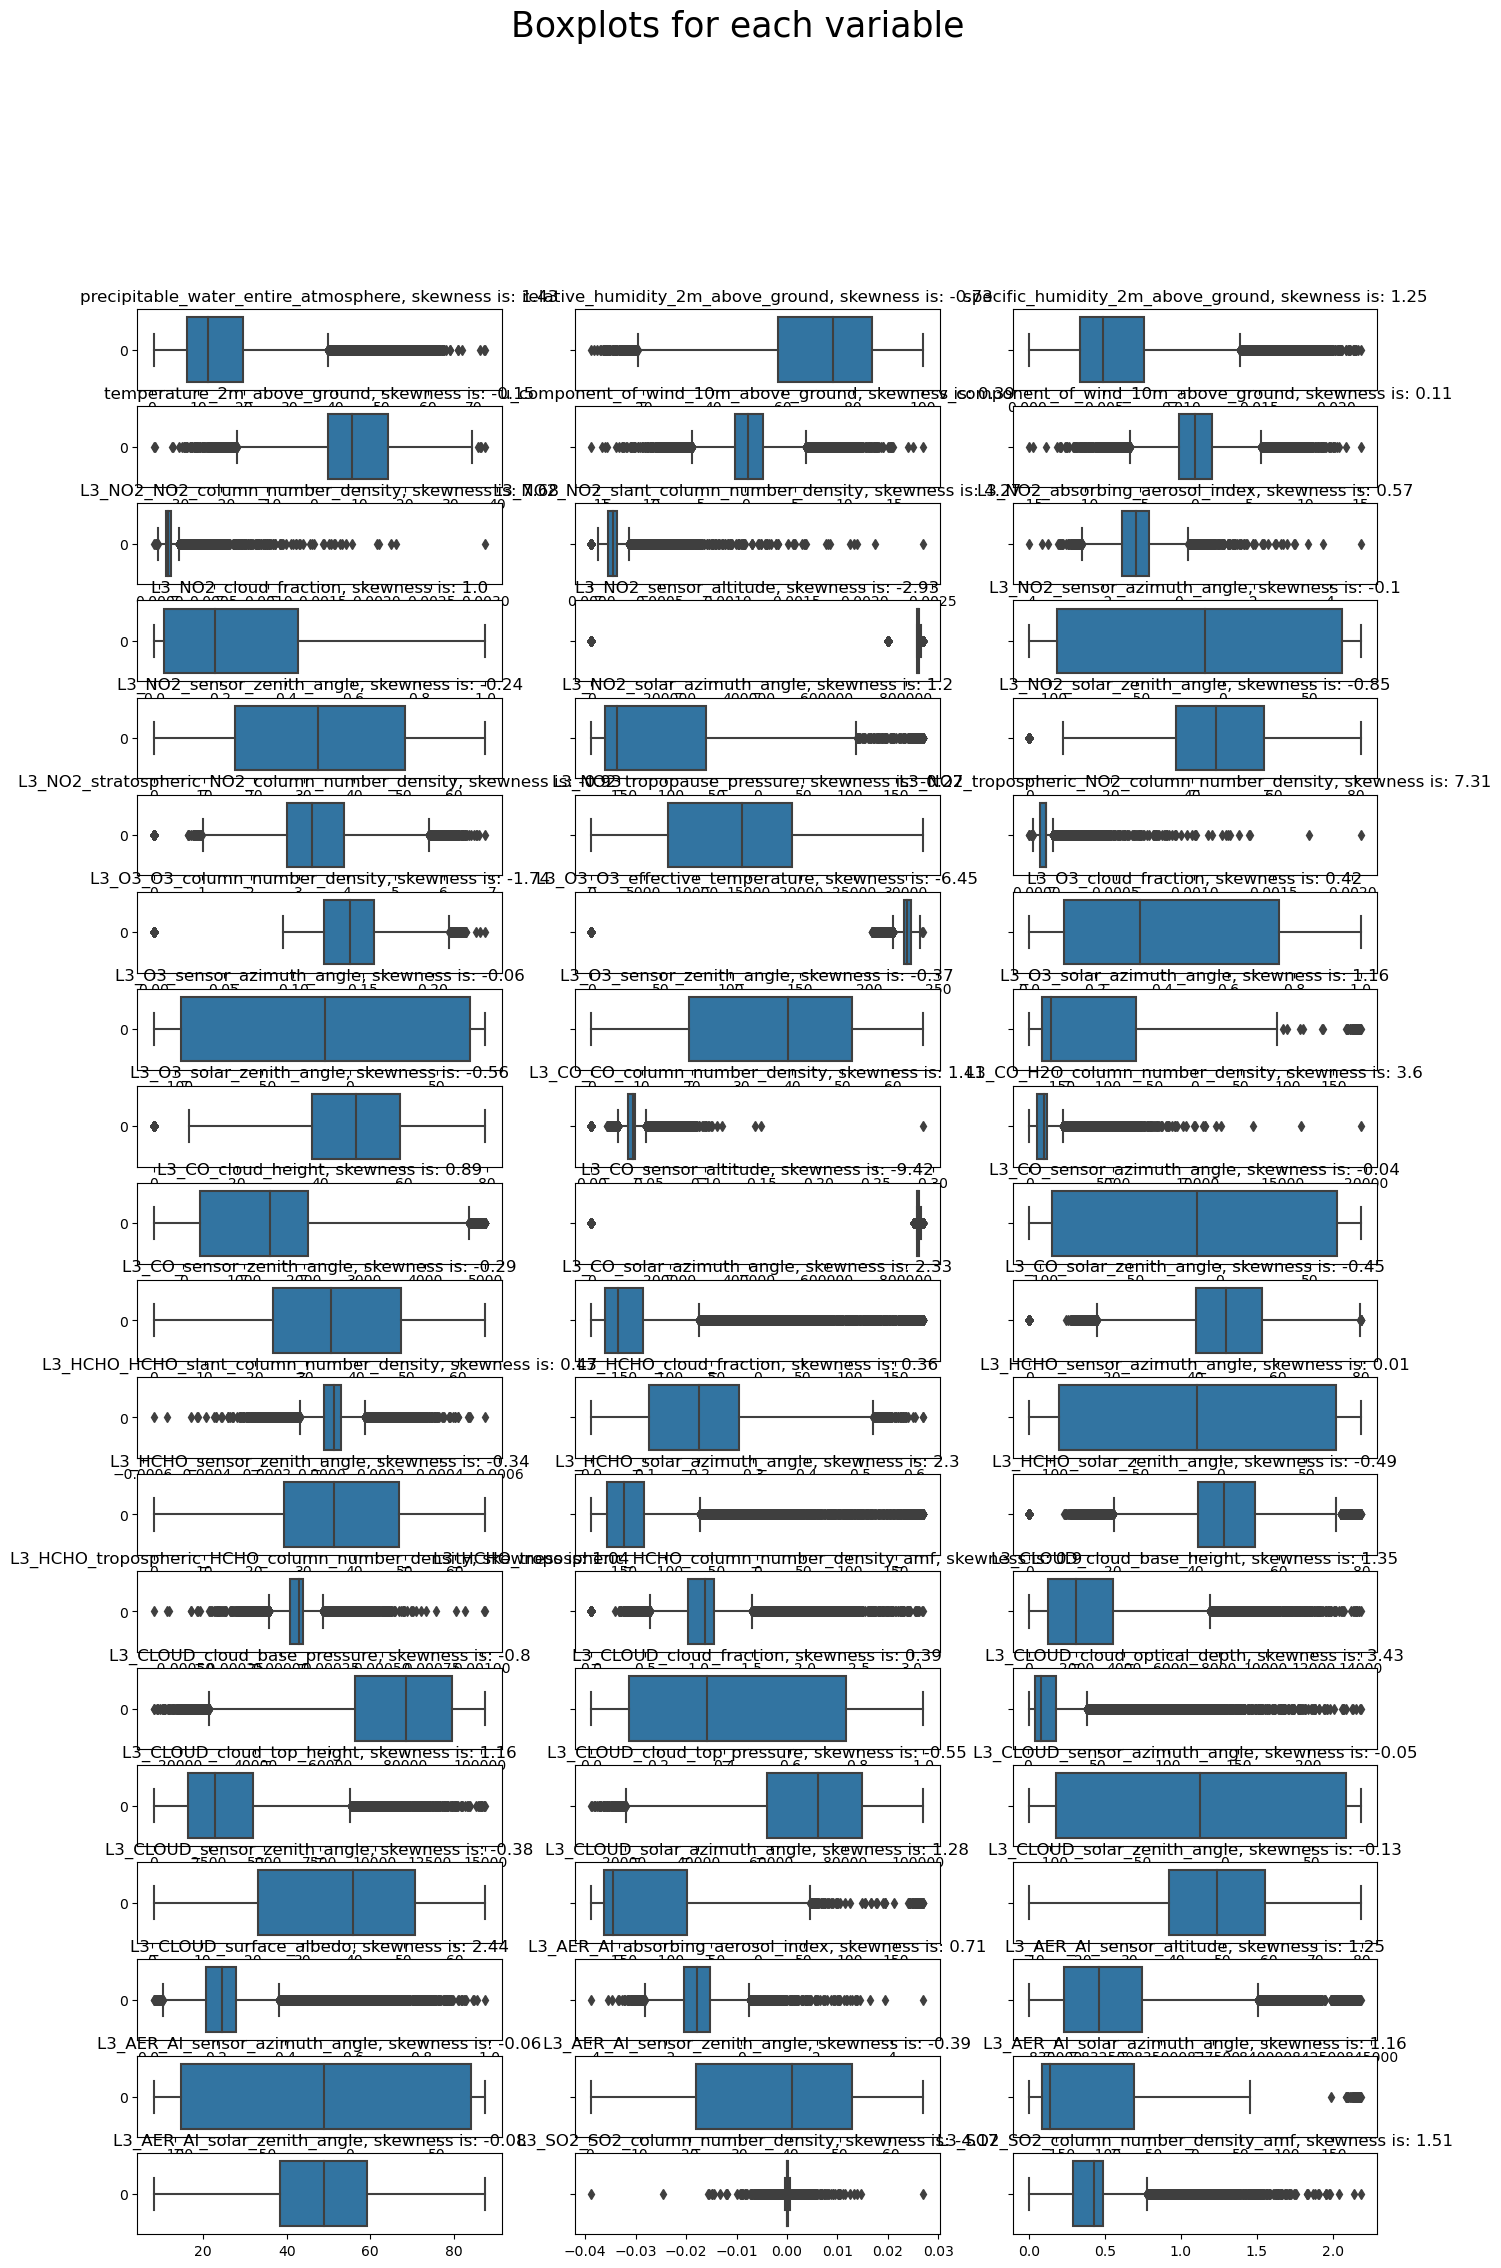

In [19]:
# Box plot for each column
numeric_columns = (list(mod_air_df.loc[:, 'precipitable_water_entire_atmosphere':'L3_SO2_solar_zenith_angle']))

# checking boxplots
def boxplots_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(16,25))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[i])
        axs[i].set_title(data + ', skewness is: '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))
        
boxplots_custom(dataset=mod_air_df, columns_list=numeric_columns, rows=20, cols=3, suptitle='Boxplots for each variable')
plt.tight_layout()

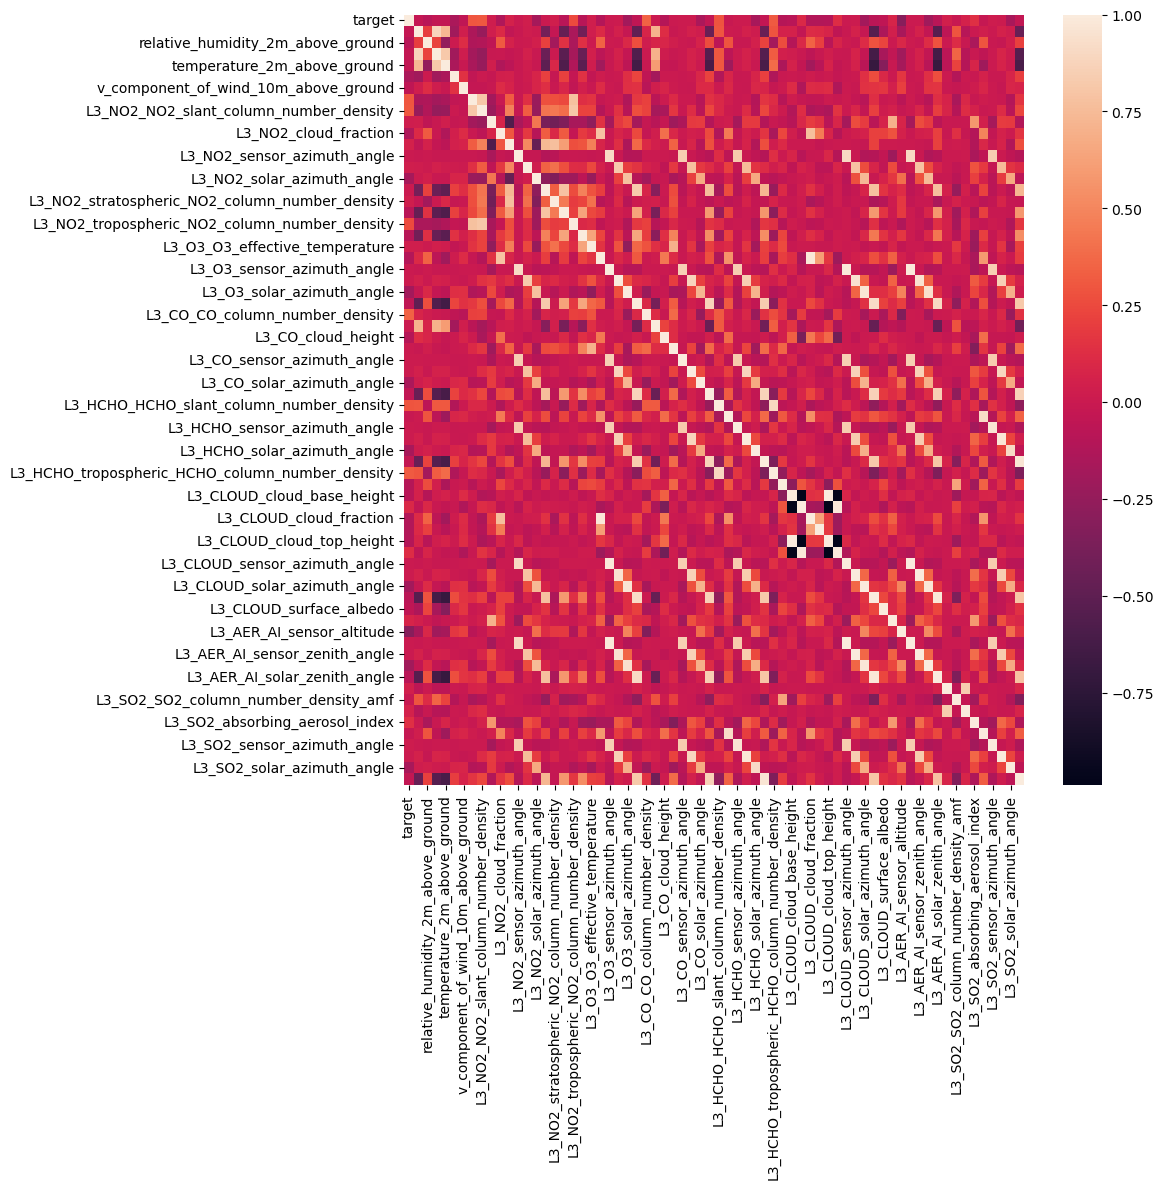

In [20]:
# Heatborn of the correlation
plt.figure(figsize=(10,10))
sns.heatmap(mod_air_df.corr())
plt.show()

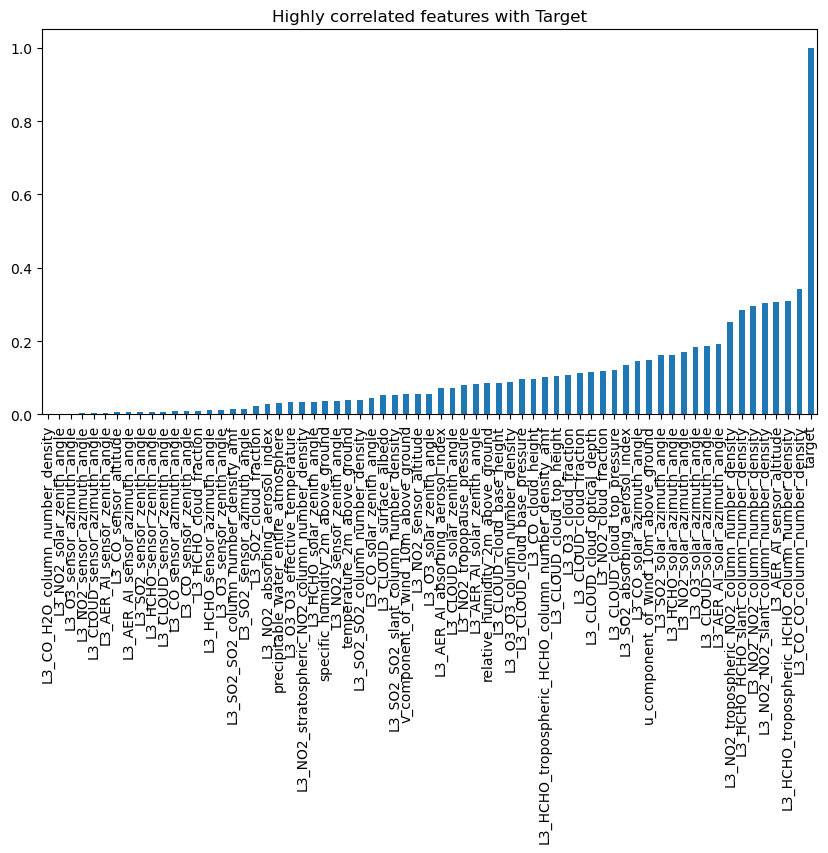

In [21]:
plt.figure(figsize=(10,5))
d = mod_air_df.corr()['target'][:-1].abs().sort_values().plot(kind='bar', title='Highly correlated features with Target')

In [22]:
#Correlation with output variable
correlation=mod_air_df.corr()
cor_target = abs(correlation["target"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target < 1]
relevant_features.sort_values(ascending=False)  

L3_CO_CO_column_number_density                     0.341727
L3_HCHO_tropospheric_HCHO_column_number_density    0.309343
L3_AER_AI_sensor_altitude                          0.307659
L3_NO2_NO2_slant_column_number_density             0.303845
L3_NO2_NO2_column_number_density                   0.295235
                                                     ...   
L3_CLOUD_sensor_azimuth_angle                      0.003747
L3_NO2_sensor_azimuth_angle                        0.003582
L3_O3_sensor_azimuth_angle                         0.001777
L3_NO2_solar_zenith_angle                          0.001148
L3_CO_H2O_column_number_density                    0.000542
Name: target, Length: 67, dtype: float64

In [23]:
# The top 20 features that correlate well with the target variable
relevant_features=relevant_features.sort_values(ascending=False).head(30)
columns= relevant_features.index 

# Create data
X=mod_air_df[columns]
y=mod_air_df["target"]

In [24]:
relevant_features

L3_CO_CO_column_number_density                         0.341727
L3_HCHO_tropospheric_HCHO_column_number_density        0.309343
L3_AER_AI_sensor_altitude                              0.307659
L3_NO2_NO2_slant_column_number_density                 0.303845
L3_NO2_NO2_column_number_density                       0.295235
L3_HCHO_HCHO_slant_column_number_density               0.285927
L3_NO2_tropospheric_NO2_column_number_density          0.252196
L3_AER_AI_solar_azimuth_angle                          0.193027
L3_CLOUD_solar_azimuth_angle                           0.186808
L3_O3_solar_azimuth_angle                              0.184771
L3_NO2_solar_azimuth_angle                             0.171171
L3_HCHO_solar_azimuth_angle                            0.161788
L3_SO2_solar_azimuth_angle                             0.161573
u_component_of_wind_10m_above_ground                   0.148202
L3_CO_solar_azimuth_angle                              0.145476
L3_SO2_absorbing_aerosol_index          

In [25]:
X.head()

,L3_CO_CO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_AER_AI_sensor_altitude,L3_NO2_NO2_slant_column_number_density,L3_NO2_NO2_column_number_density,L3_HCHO_HCHO_slant_column_number_density,L3_NO2_tropospheric_NO2_column_number_density,L3_AER_AI_solar_azimuth_angle,L3_CLOUD_solar_azimuth_angle,L3_O3_solar_azimuth_angle,...,L3_O3_cloud_fraction,L3_CLOUD_cloud_top_height,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CO_cloud_height,L3_CLOUD_cloud_base_pressure,L3_O3_O3_column_number_density,L3_CLOUD_cloud_base_height,relative_humidity_2m_above_ground,L3_AER_AI_solar_zenith_angle,L3_NO2_tropopause_pressure
0,0.021080,0.000064,840209.874619,0.000156,0.000074,-0.000010,0.000017,-61.736719,-61.752587,-61.752587,...,0.000000,3286.134009,0.566828,267.017184,77491.774334,0.119095,2510.989311,60.200001,22.358167,6156.074219
1,0.022017,0.000171,840772.941995,0.000197,0.000076,0.000114,0.000021,-67.693509,-67.693509,-67.693509,...,0.059433,175.072145,0.858446,61.216687,99354.162958,0.115179,175.019862,48.799999,28.614804,6156.074219
2,0.020677,0.000124,841410.713456,0.000170,0.000067,0.000027,0.000007,-78.342701,-78.342701,-78.342701,...,0.082063,508.977723,0.910536,134.700335,98118.935248,0.115876,275.903991,33.400002,34.296977,7311.869141
3,0.021207,0.000081,841103.242368,0.000175,0.000083,0.000023,0.000023,-73.896572,-73.896588,-73.896588,...,0.121261,495.380407,1.132571,474.821444,97258.462755,0.141557,383.692363,21.300001,30.545393,11205.388333
4,0.037766,0.000140,840763.055499,0.000142,0.000070,0.000037,0.000009,-68.612480,-68.612480,-68.612480,...,0.037919,5314.483207,0.649359,926.926310,59875.027957,0.126369,4314.483127,44.700001,26.899694,11205.372845


## PREDICTION OF THE AIR QUALITY
Since we are predicting a numerical variable we will use regression models:
* Linear Regression (can be used for both categorical and regression)
* Ridge Regression
* Random Forest Regressor

In [26]:
mod_air_df.head()

,target,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_NO2_absorbing_aerosol_index,...,L3_AER_AI_solar_zenith_angle,L3_SO2_SO2_column_number_density,L3_SO2_SO2_column_number_density_amf,L3_SO2_SO2_slant_column_number_density,L3_SO2_absorbing_aerosol_index,L3_SO2_cloud_fraction,L3_SO2_sensor_azimuth_angle,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle
0,38.0,11.000000,60.200001,0.00804,18.516840,1.996377,-1.227395,0.000074,0.000156,-1.231330,...,22.358167,-0.000127,0.312521,-0.000040,-1.861476,0.000000,76.536426,38.593017,-61.752587,22.363665
1,39.0,14.600000,48.799999,0.00839,22.546533,3.330430,-1.188108,0.000076,0.000197,-1.082553,...,28.614804,0.000150,0.433957,0.000050,-1.452612,0.059433,-14.708036,59.624912,-67.693509,28.614804
2,24.0,16.400000,33.400002,0.00750,27.031030,5.065727,3.500559,0.000067,0.000170,-1.001242,...,34.296977,0.000150,0.356925,0.000053,-1.572950,0.082063,-105.201338,49.839714,-78.342701,34.296977
3,49.0,6.911948,21.300001,0.00391,23.971857,3.004001,1.099468,0.000083,0.000175,-0.777019,...,30.545393,0.000227,0.584522,0.000110,-1.239317,0.121261,-104.334066,29.181258,-73.896588,30.545446
4,21.0,13.900001,44.700001,0.00535,16.816309,2.621787,2.670559,0.000070,0.000142,0.366323,...,26.899694,0.000390,0.408047,0.000159,0.202489,0.037919,58.850179,0.797294,-68.612480,26.899694


### Prepare the data itself
Since it is the train data, we will split it into training set and validation set. The test set will be loaded later.

In [27]:
# Set the random seed
np.random.seed(142)

In [28]:
# Split the data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.3)

X_train.head()

,L3_CO_CO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_AER_AI_sensor_altitude,L3_NO2_NO2_slant_column_number_density,L3_NO2_NO2_column_number_density,L3_HCHO_HCHO_slant_column_number_density,L3_NO2_tropospheric_NO2_column_number_density,L3_AER_AI_solar_azimuth_angle,L3_CLOUD_solar_azimuth_angle,L3_O3_solar_azimuth_angle,...,L3_O3_cloud_fraction,L3_CLOUD_cloud_top_height,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CO_cloud_height,L3_CLOUD_cloud_base_pressure,L3_O3_O3_column_number_density,L3_CLOUD_cloud_base_height,relative_humidity_2m_above_ground,L3_AER_AI_solar_zenith_angle,L3_NO2_tropopause_pressure
2191,0.032595,-0.000003,831068.016613,0.000139,0.000063,-0.000050,0.000056,-172.182879,-172.180591,-172.180591,...,0.666629,3363.412118,1.104225,3042.830359,75927.459084,0.141386,2363.412109,54.411112,55.173347,19283.171741
9618,0.039000,0.000036,835583.775214,0.000158,0.000069,0.000029,0.000029,-0.120016,-0.120235,-0.120235,...,0.303747,1404.195819,1.389275,717.754347,94041.497326,0.154435,549.342300,81.200005,57.812171,19250.969604
17069,0.034745,0.000070,832829.410611,0.000133,0.000062,0.000039,0.000033,-162.739318,-162.738776,-162.739318,...,0.211809,6449.868505,0.879681,4998.954102,50652.667802,0.157883,5449.868506,88.300003,65.898870,22172.874734
1292,0.050997,0.000272,828887.369287,0.000160,0.000094,0.000177,0.000068,-146.227720,-146.227720,-146.227720,...,0.135122,1075.719101,0.918617,892.683799,95402.142548,0.110139,554.843276,87.400002,40.948450,6156.074219
8682,0.021358,0.000135,840416.830082,0.000158,0.000064,0.000050,0.000008,-36.715665,-36.715665,-36.715665,...,0.000000,3286.134009,0.744017,21.600326,77491.774334,0.126634,2510.989311,22.614286,27.935506,9582.560752


In [29]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((21389, 30), (9168, 30), (21389,), (9168,))

In [30]:
# Scale the X data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_val_sc = scaler.transform(X_val)

### Linear Regression 

In [31]:
from sklearn.linear_model import LinearRegression

# Initialize the model
l_reg = LinearRegression()

# Fit the training data on the model
l_reg.fit(X_train_sc, y_train)

# Check the score
l_reg.score(X_val_sc, y_val)

0.33093373624603584

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rfr = RandomForestRegressor()

# Fit the training data on the model
rfr.fit(X_train_sc, y_train)

# Check the score
rfr.score(X_val_sc, y_val)

0.5266275961769077

### KNN

In [33]:
from sklearn.neighbors import KNeighborsRegressor as KNN

# Initialize the model
knn = KNN()

# Fit the model
knn.fit(X_train_sc, y_train)

# Check the score
knn.score(X_val_sc, y_val)

0.42726894837598806

In [34]:
# Predict
y_pred = knn.predict(X_val_sc)
y_pred[:5]

array([115.6,  97.8,  34.6,  34.4,  71.8])

In [35]:
# Evaluate the model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2_score = r2_score(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

In [36]:
print(f"R2 Score: {r2_score}")
print(f"Mean Absolute Score: {mae}")
print(f"Mean Squared Score: {mse}")

R2 Score: 0.42726894837598806
Mean Absolute Score: 24.528621291448516
Mean Squared Score: 1312.3811337696336
